## Visual story telling part 1: green buildings


Contained within the greenbuildings.csv file is data on 7,894 commercial rental properties located across the United States. Of these properties, 685 have earned LEED or EnergyStar certifications, marking them as environmentally sustainable buildings. Detailed information about these certification systems can be accessed online, for instance, at www.usgbc.org. In essence, commercial properties can receive a green certification when they satisfy environmental standards related to energy efficiency, carbon emissions, site selection, and construction materials, as evaluated by external engineers.


A team of real estate economists compiled the data by starting with 1,360 green-certified buildings listed on the LEED and EnergyStar websites as of December 2007. They were able to obtain current information on building characteristics and monthly rents for 685 of these buildings. To create a control group, each of these 685 green-certified buildings was paired with a cluster of nearby commercial buildings from the CoStar database. Each cluster includes one green-certified building and all non-certified buildings within a quarter-mile radius. On average, each cluster consists of about 12 buildings, resulting in a total of 7,894 data points.

The situation Investors and the general public have become more aware of the advantages of environmentally friendly buildings within the last 10 years.
The green buildings case highlights the multifaceted benefits of investing in green buildings, which not only cater to environmental responsibilities but also offer significant economic incentives for stakeholders in the commercial real estate sector.

Here’s a breakdown of the potential advantages:

1. Reduced Operating Costs:

+ Green buildings are designed to be energy-efficient and use resources like water and electricity more sparingly.
+ This translates into lower utility bills, which can be a major selling point.

2. Enhanced Work Environment:

+ The focus on natural light, better air quality, and use of non-toxic materials can enhance worker comfort and health, potentially leading to increased productivity and reduced absenteeism.
+ This can make green buildings more attractive to businesses that prioritize employee well-being.
  
3. Positive Public Relations:

+ Investing in green buildings can improve a company's public image. As environmental concerns become more central to consumer and investor decisions, having a demonstrable commitment to sustainability can enhance a brand’s reputation.
+ This might allow companies to attract premium tenants, charge higher rents, and appeal to top-tier employees.
4. Long-Term Viability:

+ The emphasis on life-cycle analysis in green building design anticipates future savings and longevity, making these buildings more sustainable not just environmentally but economically.
+ They are built to be adaptable to changing energy prices and other market conditions, potentially making them more resilient investments.


Naturally, a lot of this is just speculation. Tenants may or may not be prepared to pay more for renting space in green buildings in the end. Only by closely reviewing data on the commercial real estate market will we be able to determine this.

The columns of the data set are coded as follows:

+ CS.PropertyID: the building's unique identifier in the CoStar database.
+ cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at least one other non-green-certified building within a quarter-mile radius of the cluster center.
+ size: the total square footage of available rental space in the building.
+ empl.gr: the year-on-year growth rate in employment in the building's geographic region.
+ Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
+ leasing.rate: a measure of occupancy; the fraction of the building's available space currently under lease.
+ stories: the height of the building in stories.
+ age: the age of the building in years.
+ renovated: whether the building has undergone substantial renovations during its lifetime.
+ class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative classifications within a specific market. + Class A buildings are generally the highest-quality properties in a given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the least desirable properties in a given market.
+ green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
+ LEED, Energystar: indicators for the two specific kinds of green certifications.
+ net: an indicator as to whether the rent is quoted on a "net contract" basis. Tenants with net-rental contracts pay their own utility costs, which are otherwise included in the quoted rental price.
+ amenities: an indicator of whether at least one of the following amenities is available on-site: bank, convenience store, dry cleaner, restaurant, retail shops, fitness center.
+ cd.total.07: number of cooling degree days in the building's region in 2007. A degree day is a measure of demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a baseline outdoor temperature, below which a building needs no cooling.
+ hd.total07: number of heating degree days in the building's region in 2007. Heating degree days are also measured relative to a baseline outdoor temperature, above which a building needs no heating.
+ total.dd.07: the total number of degree days (either heating or cooling) in the building's region in 2007.
+ Precipitation: annual precipitation in inches in the building's geographic region.
+ Gas.Costs: a measure of how much natural gas costs in the building's geographic region.
+ Electricity.Costs: a measure of how much electricity costs in the building's geographic region.
+ cluster.rent: a measure of average rent per square-foot per calendar year in the building's local market.

In [25]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [27]:
pd.set_option('display.max_columns',None)

In [29]:
# Load the dataset
gb = pd.read_csv('greenbuildings.csv')
gb.head(3)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [31]:
# Data Cleaning - Remove buildings with low occupancy rates (<10%)
gb_clean = gb[gb['leasing_rate'] >= 0.1]
gb_clean

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,1,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


We constructed a dataframe that only contains properties with a lease rate of more than 10% in order to adhere to the gurus' recommendations.

In [35]:
# Data Cleaning - Remove buildings with low occupancy rates (<10%)
gb_clean = gb[gb['leasing_rate'] >= 0.1]
gb_clean

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,0,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,1,0,0,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


## Validating Guru's Conjecture

In [38]:
# Rent Comparison - Calculate the median rent for green and non-green buildings
gb_clean.groupby('green_rating')[['Rent']].median()

,Rent
green_rating,
0,25.0
1,27.6


The figure above illustrates the $2.6 difference between green and non-green buildings. Over 10% occupancy is taken into account. The outcomes support the guru's assertion. Next, we will be using a boxplot to visualise the rent distribution.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\3528431332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gb_clean, x='green_rating', y='Rent', palette='bright')


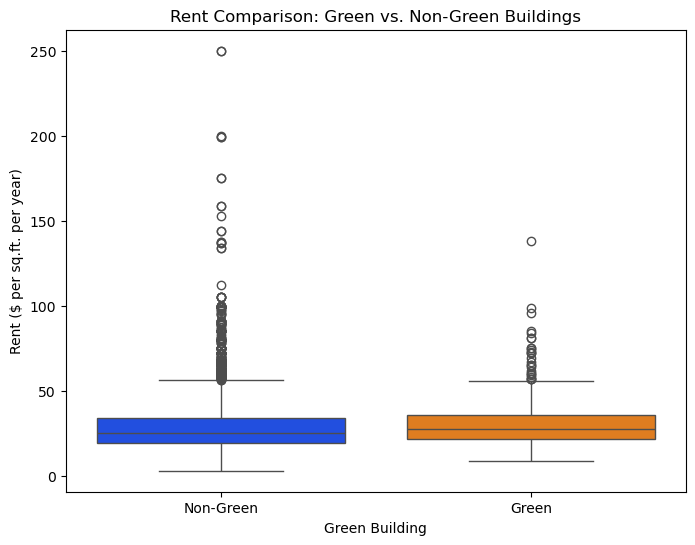

In [110]:
# Rent Comparison - Visualize the rent for green and non-green buildings
plt.figure(figsize=(8, 6))
sns.boxplot(data=gb_clean, x='green_rating', y='Rent', palette='bright')
plt.xlabel('Green Building')
plt.ylabel('Rent ($ per sq.ft. per year)')
plt.title('Rent Comparison: Green vs. Non-Green Buildings')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

The guru's reasoning for choosing the median over the mean makes sense because non-green buildings have more outliers than green ones.

To gain a deeper comprehension of the correlations, we will still conduct a multivariate linear regression before drilling down.

In [208]:
#Creating design matrices for OLS regression with 'Rent' as the dependent variable
y, X = dmatrices('Rent ~ cluster + size + empl_gr + leasing_rate + stories + age + renovated + class_a + class_b + LEED + Energystar + green_rating + net + amenities + cd_total_07 + hd_total07 + Precipitation + Gas_Costs + Electricity_Costs + cluster_rent',
                 data=gb_clean, return_type='dataframe')

model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     598.9
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:18:49   Log-Likelihood:                -28073.
No. Observations:                7661   AIC:                         5.619e+04
Df Residuals:                    7640   BIC:                         5.633e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.9932      1.07

It is noteworthy to observe that a building's certification as LEED or EnergyStar does not appear to be a statistically relevant indicator. indicating that further research is needed to determine how rent and other factors are related. 

## Exploratory Analysis

### Class of the Building

The medians between green and non-green buildings were taken by the guru. However, he failed to take the building's class into account. This might have an impact on the rent amount.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\1193900894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='Rent', data=gb_clean, palette='colorblind')


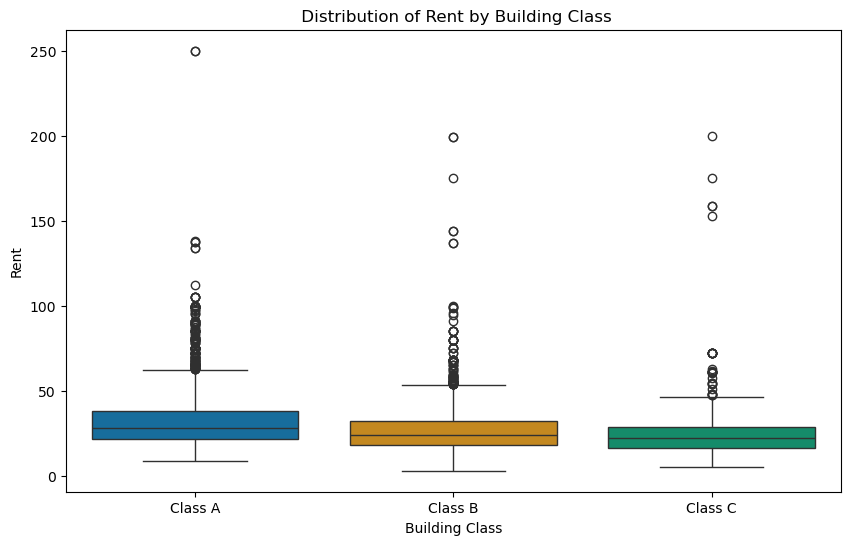

In [210]:
# Create a new column class
gb_clean['class'] = np.where(gb_clean['class_a'] == 1, 'Class A', np.where(
    gb_clean['class_b'] == 1, 'Class B', 'Class C'))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Rent', data=gb_clean, palette='colorblind')
plt.xlabel('Building Class')
plt.ylabel('Rent')
plt.title(' Distribution of Rent by Building Class')
plt.show()

We can observe from the boxplot that the rent varies by class. Rent is greatest in Class A and lowest in Class C. We may thus assume that there is a relationship between building quality and rent.

We may investigate further how premiums for green and non-green buildings vary when class is unchanged.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\4248894829.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='median', hue='green_rating',


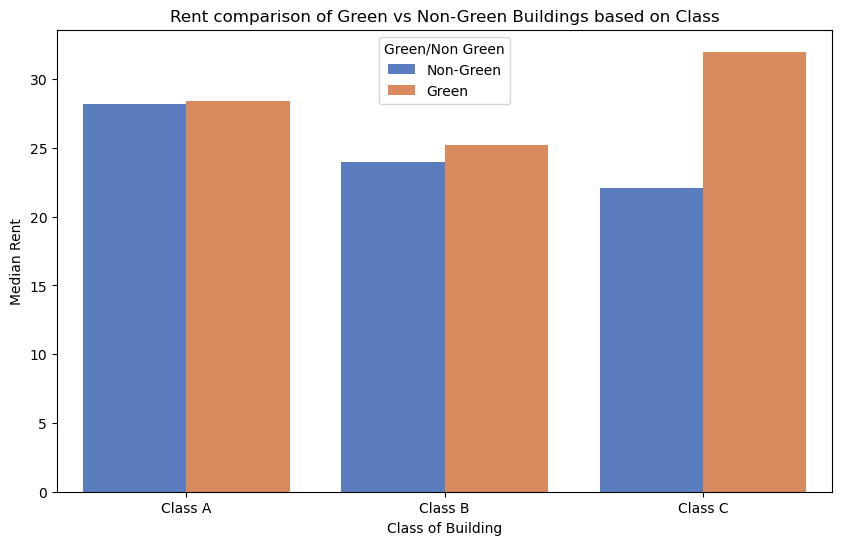

In [114]:
# Group and summarize the data
class_groupby = gb_clean.groupby(['class', 'green_rating'])['Rent'].agg(['median','mean']).reset_index()
class_groupby

# Create the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='median', hue='green_rating',
            data=class_groupby, palette='muted', ci=None)
plt.xlabel('Class of Building')
plt.ylabel('Median Rent')
plt.title('Rent comparison of Green vs Non-Green Buildings based on Class')
plt.legend(title='Green/Non Green', labels=['Non-Green', 'Green'])
plt.show()

Rent for high-quality green buildings is somewhat more than that of non-green buildings, according to the graph. Green buildings will impose a comparatively high rent premium on low-quality buildings (Class C).

Thus, it's critical to comprehend the calibre of our next project.

### Age

Rental prices for newer buildings are often greater than those for older ones. Since green buildings are a relatively new idea, age may also have an effect on rent.

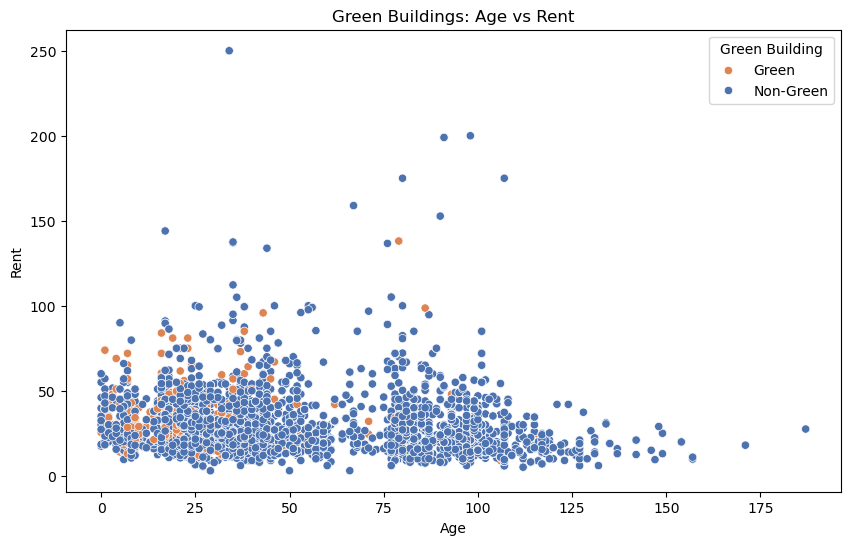

In [116]:
# Creating the scatter plot of age and Rent for green and non green buildings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gb_clean, x='age', y='Rent', hue='green_rating', palette='deep')
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Green Buildings: Age vs Rent')
plt.legend(title='Green Building', labels=['Green', 'Non-Green'])
plt.show()

Rent does not appear to be highly correlated with age. Furthermore, after 50 years of age, the number of non-green buildings exceeds that of green structures. However, let us examine more closely the age and rental difference between non-green and green.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\83125572.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agebins_groupby = gb_clean.groupby(['agebins', 'green_rating']).agg(mean_rent=('Rent', 'mean'), n=('Rent', 'count')).reset_index()


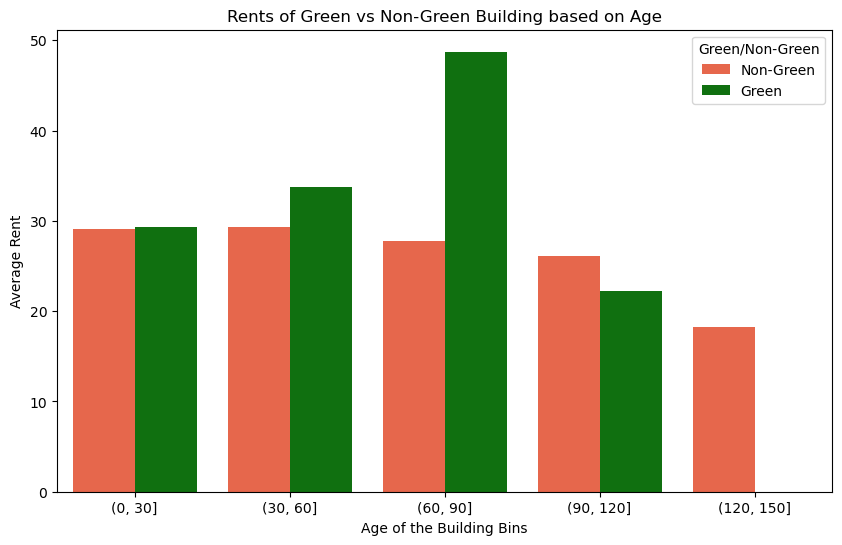

In [165]:
# Creating the age bins using pandas
age_bins = [0, 30, 60, 90, 120, 150]
gb_clean = gb_clean.copy()  # This ensures any operations are done on a copy
gb_clean.loc[:, 'agebins'] = pd.cut(gb_clean['age'], bins=age_bins)

# Grouping and summarizing the data using pandas
agebins_groupby = gb_clean.groupby(['agebins', 'green_rating']).agg(mean_rent=('Rent', 'mean'), n=('Rent', 'count')).reset_index()

# Creating the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='agebins', y='mean_rent', hue='green_rating', data=agebins_groupby, palette=['#FF5733', '#008000'], errorbar=None)
plt.xlabel('Age of the Building Bins')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Age')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

The graphic indicates that the rent for both types of buildings is similar in younger structures, but that the rental rates of green buildings tend to grow with building age. We may propose that the rent for green and non-green buildings in the new project won't differ much.

## Clusters

The influence of the neighbourhood on the premium of green houses over non-green properties is not taken into account in the guru's study. We categorised the data according to the 'cluster_rent' column, which may be used as a stand-in for the neighbourhood, in order to streamline the study and minimise the number of clusters. The rent of the cluster is shown in this column and is dependent on its geographic location.


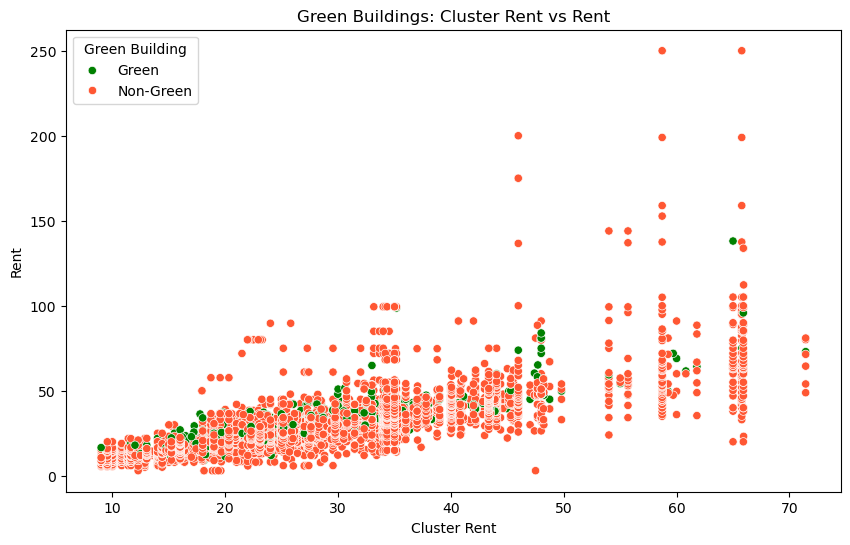

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gb_clean, x='cluster_rent', y='Rent',
                hue='green_rating', palette=['#FF5733', '#008000'])
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Green Buildings: Cluster Rent vs Rent')
plt.legend(title='Green Building', labels=['Green', 'Non-Green'])
plt.show()

As predicted, there is a correlation between rent and the cluster rent.

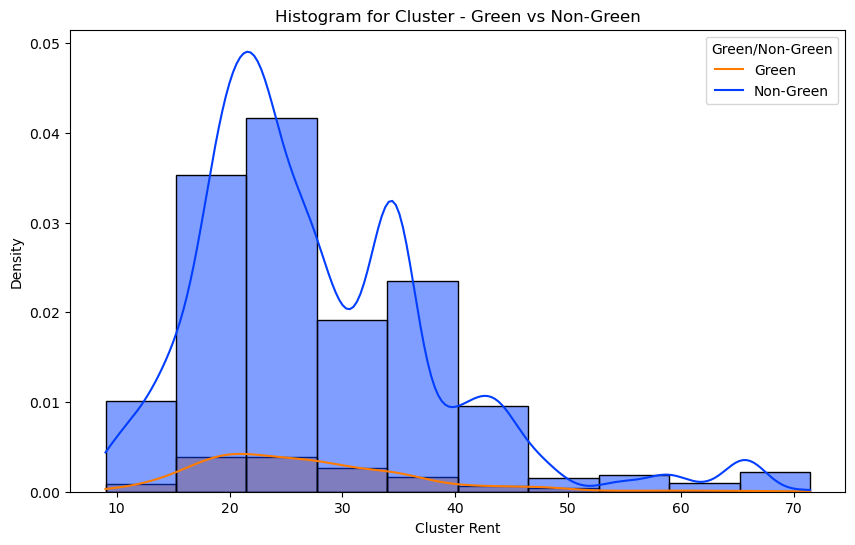

In [138]:
# Graph a histplot of distributions of green and non-green building 
plt.figure(figsize=(10, 6))
sns.histplot(data=gb_clean, x='cluster_rent', hue='green_rating',
             binwidth=6, kde=True, palette='bright', alpha=0.5, stat='density')
plt.xlabel('Cluster Rent')
plt.ylabel('Density')
plt.title('Histogram for Cluster - Green vs Non-Green')
plt.legend(title='Green/Non-Green',labels=['Green', 'Non-Green'])
plt.show()

The skew of the green and non-green buildings is nearly same, as can be shown, suggesting that the majority of the data points are concentrated in the range of 15 to 25 percent of cluster rent. Based on cluster rent, let's now group by the two types of buildings.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\1771516182.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_bins_groupby = gb_clean.groupby(['cluster_bins', 'green_rating']).agg(


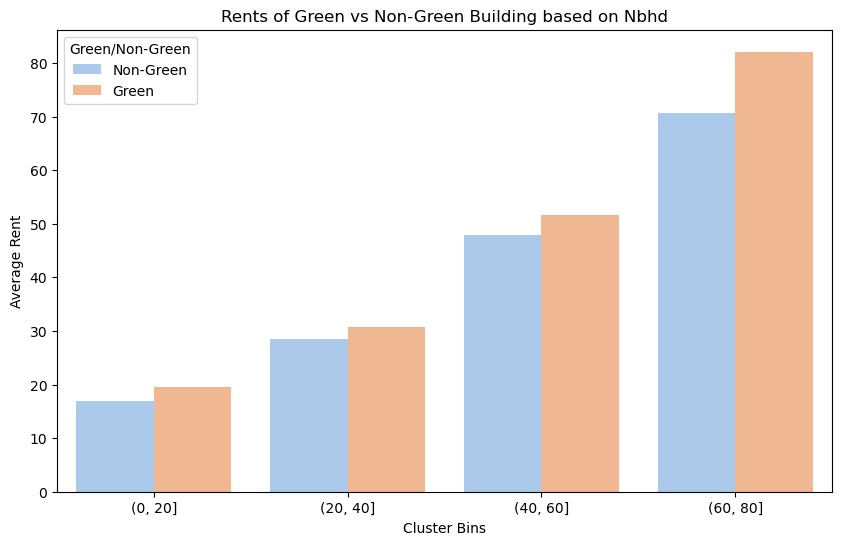

In [161]:
# Creating the 'cluster_bins' column using cut function
gb_clean['cluster_bins'] = pd.cut(gb_clean['cluster_rent'], bins=[
                               0, 20, 40, 60, 80])

# Grouping and summarizing the data using pandas
cluster_bins_groupby = gb_clean.groupby(['cluster_bins', 'green_rating']).agg(
    mean_rent=('Rent', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_bins', y='mean_rent', hue='green_rating',
            data=cluster_bins_groupby, palette='pastel', errorbar=None)
plt.xlabel('Cluster Bins')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Nbhd')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

The premium that green buildings pay over non-green buildings varies depending on the neighbourhood in which they are situated, as seen in the above chart. However, there will always be a premium for green buildings.

## Renovated

The impact of renovation on the price difference between green and non-green properties was not taken into account in the guru's research.

Renovated buildings, regardless of their green status, typically command higher rents or sale prices due to updated facilities, modern aesthetics, and compliance with current building standards. For green buildings, renovations may further enhance their appeal by incorporating advanced sustainable technologies or materials that improve energy efficiency and reduce operational costs.

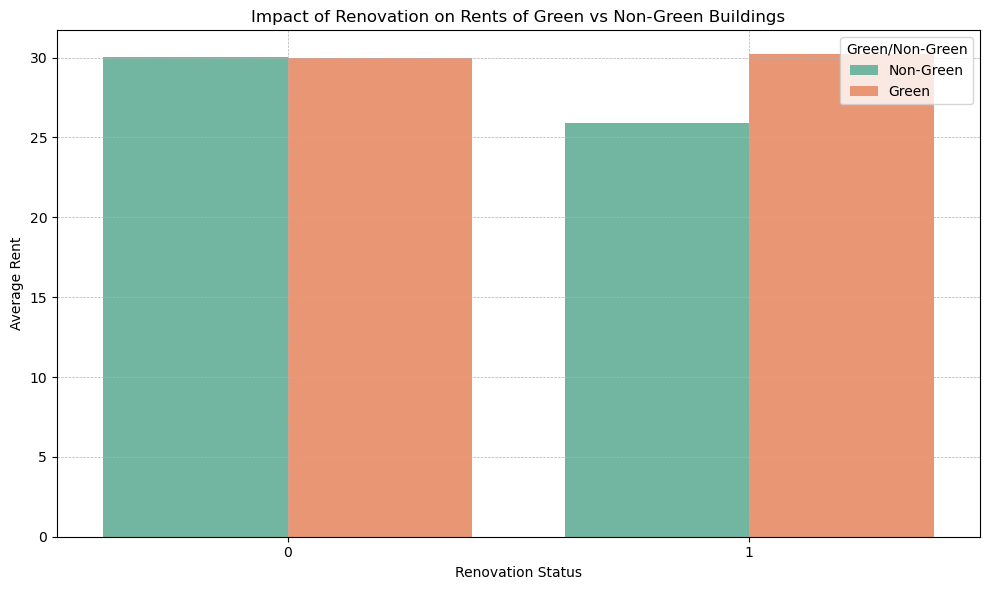

In [212]:
renovation_groupby = gb_clean.groupby(['renovated', 'green_rating'], observed=True).agg(
    mean_rent=('Rent', 'mean'),
    n=('Rent', 'count')
).reset_index()

# Set up the figure for plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='renovated', y='mean_rent', hue='green_rating', data=renovation_groupby, 
            palette='Set2', errorbar=None)  # Using Set2 palette for better color distinction
plt.xlabel('Renovation Status')
plt.ylabel('Average Rent')
plt.title('Impact of Renovation on Rents of Green vs Non-Green Buildings')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for easier reading
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

The accompanying graphic indicates that renovation significantly influences the rental prices of both green and non-green buildings. However, it suggests that renovations lead to a higher average rent for green buildings compared to non-green ones. This could imply that renovations enhance the inherent value of green features, potentially increasing their attractiveness and financial return compared to non-green buildings.

## Number of Stories

The research should take into account a building's story count since it can also have a big effect on rental prices. various story counts in buildings might mean various facilities, views, and living situations, which can affect demand overall and rental costs.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\2100335782.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  storybins_groupby = gb_clean.groupby(['story_bins', 'green_rating']).agg(


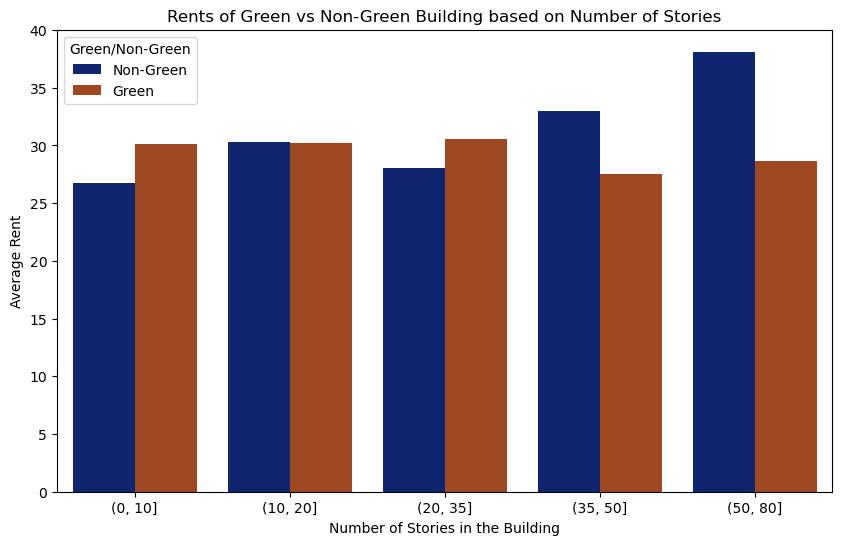

In [179]:
# Creating the 'story_bins' column using pandas cut function
gb_clean['story_bins'] = pd.cut(gb_clean['stories'], bins=[
                                0, 10, 20, 35, 50, 80])

# Grouping and summarizing the data using pandas
storybins_groupby = gb_clean.groupby(['story_bins', 'green_rating']).agg(
    mean_rent=('Rent', 'mean')).reset_index()

# Creating the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='story_bins', y='mean_rent', hue='green_rating',
            data=storybins_groupby, palette='dark',  errorbar=None)
plt.xlabel('Number of Stories in the Building')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Number of Stories')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

## Green Rating

The research should incorporate a building's green rating as it significantly influences rental rates. A higher green rating often correlates with enhanced sustainability features and energy efficiency, which can attract tenants looking for eco-friendly living or operating spaces. These attributes can lead to higher demand and potentially elevated rental costs, underscoring the value of green certifications in commercial real estate evaluations.

C:\Users\girir\AppData\Local\Temp\ipykernel_8244\4120334291.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  storybins_groupby = gb_clean.groupby(['story_bins', 'green_rating']).agg(


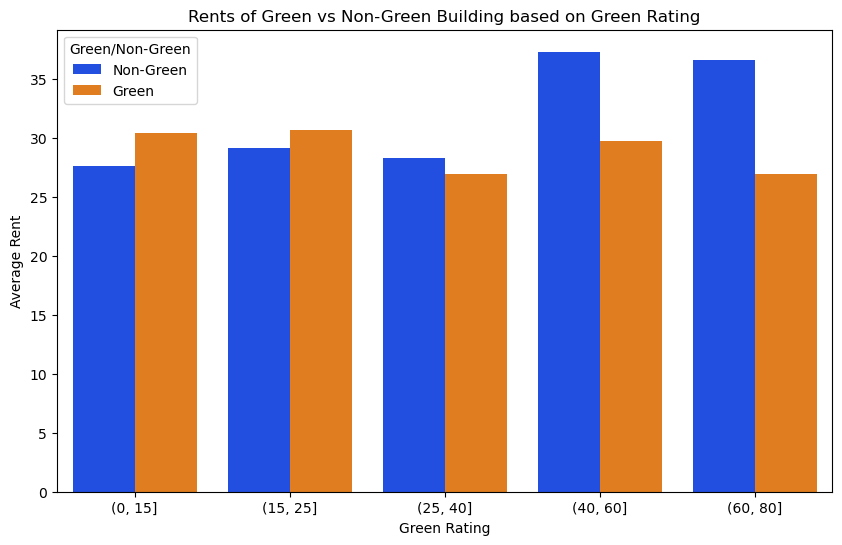

In [233]:
# Creating the 'story_bins' column using pandas cut function
gb_clean['story_bins'] = pd.cut(gb_clean['stories'], bins=[0, 15, 25, 40, 60, 80])

# Grouping and summarizing the data using pandas
storybins_groupby = gb_clean.groupby(['story_bins', 'green_rating']).agg(
    mean_rent=('Rent', 'mean')).reset_index()

# Creating the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='story_bins', y='mean_rent', hue='green_rating',
            data=storybins_groupby, palette='bright', errorbar=None)
plt.xlabel('Green Rating')
plt.ylabel('Average Rent')
plt.title('Rents of Green vs Non-Green Building based on Green Rating')
plt.legend(title='Green/Non-Green', labels=['Non-Green', 'Green'])
plt.show()

The premium of green buildings over non-green buildings varies with the number of stories, as illustrated by the inconsistent differences across story bins. This variability suggests that the number of stories in a building significantly influences its rental pricing dynamics. Hence, incorporating the number of stories into our analysis is crucial to accurately assess the financial impact of green certifications on property values.

Depending on the number of storeys, not all bins (groups) have the same premium for green houses over non-green houses. This discrepancy makes it clear that we need to have considered the quantity of stories while doing the study.

These benefits provide compelling reasons for the shift towards green building investments in commercial real estate. They cater to both the trend of increasing environmental awareness and the practical financial benefits sought by investors. The challenge lies in accurately quantifying these benefits to present a clear case for the return on investment (ROI) to stakeholders who may still be on the fence about green technologies. This is where detailed cost-benefit analyses, predictive modeling, and gathering empirical evidence from existing green buildings come into play, offering concrete data to support investment decisions.

## Conclusion

There are multiple factors that can influence the rent of a building, such as building quality (class),age and amenities. It appears that a significant portion of the difference in rent between green and non-green buildings is driven by the skewed age and class distribution of these two groups, indicating that the rental premium observed for green buildings may not be solely attributed to their environmentally friendly features but rather influenced by other factors.